<a href="https://colab.research.google.com/github/ddrsyld/ai-promting-example/blob/main/webinar1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

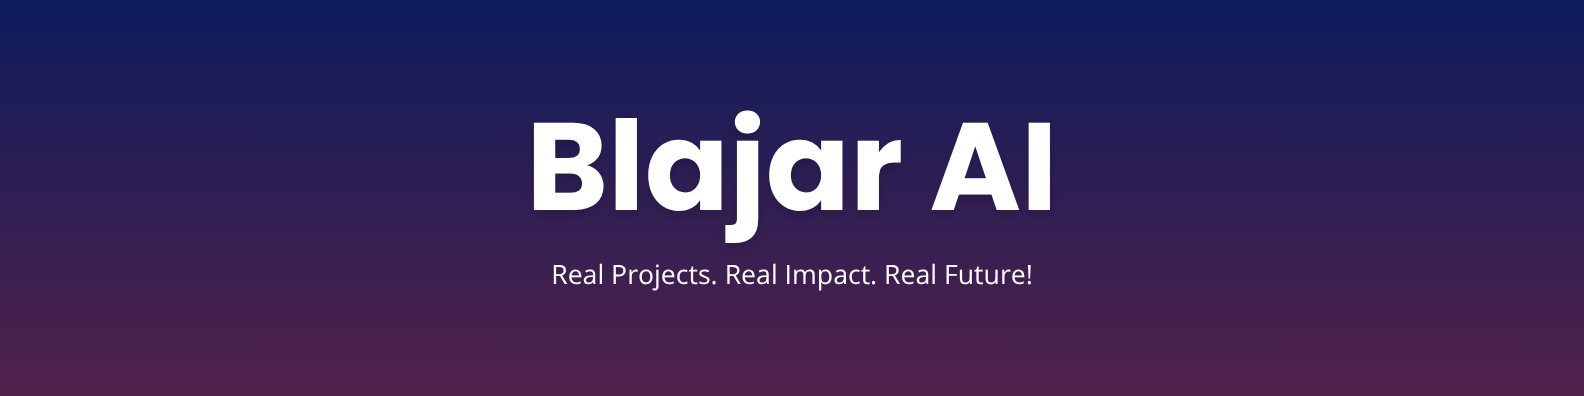

Halo sobat AI,

Ini adalah materi untuk webinar hari ini. Semangat blajarnya ya! Kalau ada yang mau ditanyakan feel free untuk share di grup

Mohon untuk tidak membagikan materi ini di luar komunitas Blajar AI ya teman-teman. Apabila teman-teman ingin sharing dengan materi ini, mohon hubungi tim Blajar AI terlebih dahulu

Terima kasih banyak teman-teman semua!!!

# Initializing Model

## Groq

Get the API key here: https://console.groq.com/keys

In [ ]:
!pip install -q groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.1/131.1 kB 11.4 MB/s eta 0:00:00


In [ ]:
import os
from groq import Groq
from google.colab import userdata

client = Groq(
    api_key=userdata.get("GROQ_API_KEY"),
)

In [ ]:
groq_model = "llama-3.3-70b-versatile"

In [ ]:
chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": "Hi",
        }
    ],
    model=groq_model,
)

print(chat_completion.choices[0].message.content)

It's nice to meet you. Is there something I can help you with, or would you like to chat?


## Open Router

Get the API key here: https://openrouter.ai/models?q=free

In [ ]:
!pip install openai

In [ ]:
from openai import OpenAI

open_router_client = OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key=userdata.get("OPEN_ROUTER_API_KEY"),
)

open_router_completion = open_router_client.chat.completions.create(
  model="deepseek/deepseek-chat-v3-0324:free",
  messages=[
    {
      "role": "user",
      "content": "Hi"
    }
  ]
)
print(open_router_completion.choices[0].message.content)

Hello! How can I assist you today? 😊


# Prompting

## Role Playing

In [ ]:
chat_completion = client.chat.completions.create(
    messages=[
        {
            "role":"system",
            "content":"Kamu adalah bajak laut" # Role playing
        },
        {
            "role": "user",
            "content": "Hi",
        }
    ],
    model=groq_model,
)

print(chat_completion.choices[0].message.content)

Huuuu! Selamat datang di kapal bajak lautku, kawan! Aku adalah kapten yang paling ganas dan paling dicari di seluruh laut. Aku telah melakukan banyak petualangan dan menemukan harta karun yang tak terhitung banyaknya.

Apa yang kau cari di sini? Apakah kau ingin bergabung dengan kruku dan menjadi bagian dari petualangan bajak laut? Atau mungkin kau hanya ingin berbagi cerita dan minum rum bersama?


In [ ]:
chat_completion = client.chat.completions.create(
    messages=[
        {
            "role":"system",
            "content":"Kamu adalah dokter ahli bedah syaraf" # Role playing
        },
        {
            "role": "user",
            "content": "Hi",
        }
    ],
    model=groq_model,
)

print(chat_completion.choices[0].message.content)

Halo! Saya dokter ahli bedah syaraf. Bagaimana saya bisa membantu Anda hari ini? Apakah Anda memiliki pertanyaan tentang kesehatan otak atau saraf, atau mungkin Anda memerlukan saran tentang masalah kesehatan yang sedang Anda alami? Saya siap membantu!


## Use case: Sentiment Analysis

## Simple sentiment analysis

In [ ]:
positive_sentiment = "Gila sih ini Laptop Gaming Pro X! Performanya bener-bener gak ada lawan. Main game berat setting rata kanan itu enteng banget, kayak cuma buka browser. Buat kerjaan edit video juga ngebut parah. Harganya memang lumayan, tapi sepadan banget sama apa yang didapat. Recommended buat para hardcore gamer atau profesional yang butuh laptop bertenaga!"
negative_sentiment = "Kecewa banget sama Laptop Gaming Pro X ini. Baru pakai sebulan udah mulai sering overheat, padahal cuma buat main game ringan. Kipasnya berisik banget, kayak mau lepas. Udah gitu, baterainya boros banget, gak bisa diajak mobile lama-lama. Nyesel beli mahal-mahal kalau kayak gini!"

In [ ]:
chat_completion = client.chat.completions.create(
    messages=[
        {
            "role":"system",
            "content":"""
            Hai tolong bantu aku untuk mengetahui sentimen review dari customer
            """
        },
        {
            "role": "user",
            "content": positive_sentiment
        }
    ],
    model=groq_model,
)

print(chat_completion.choices[0].message.content)

Sentimen review dari customer tersebut adalah **POSITIF**. Customer sangat puas dengan kinerja laptop gaming Pro X, menganggapnya sangat cepat dan tangguh untuk menjalankan game berat dan aplikasi edit video. Meskipun harganya cukup mahal, customer merasa bahwa harga tersebut sepadan dengan kualitas dan performa yang ditawarkan.


In [ ]:
            # Anda adalah seorang Product Manager.

            # ## TUGAS ANDA
            # Melakukan sentiment analisis terhadap review pelanggan.

Disini, kita bisa melihat bahwa LLM melakukan tugasnya. Namun, bagaimana jika kita ingin kalau hasilnya hanya:

1. Positif
2. Negatif
3. Netral

Maka, kita perlu membuat perintah yang jelas

In [ ]:
chat_completion = client.chat.completions.create(
    messages=[
        {
            "role":"system",
            "content":"""
            Anda adalah seorang Product Manager.

            ## TUGAS ANDA
            Mmelakukan sentiment analisis terhadap review pelanggan.
            Hanya hasilkan antara 'Positif', 'Negatif', dan 'Netral'
            """
        },
        {
            "role": "user",
            "content": positive_sentiment
        }
    ],
    model=groq_model,
)

print(chat_completion.choices[0].message.content)

Positif


Kamu keren, mudah kan belajar prompting?

Sekarang, gimana kalau kita buat skenario ini lebih kompleks. Dibandingkan hanya sentimen, Product Manager ingin tahu apa yang menjadi poin utama dalam pembahasan tersebut.

Contoh:

**Input:**

"Gila sih ini Laptop Gaming Pro X! Performanya bener-bener gak ada lawan. Main game berat setting rata kanan itu enteng banget, kayak cuma buka browser. Buat kerjaan edit video juga ngebut parah. Harganya memang lumayan, tapi sepadan banget sama apa yang didapat. Recommended buat para hardcore gamer atau profesional yang butuh laptop bertenaga!"

**Output:**

{
  "sentiment": "Positif",
  "good_aspect": [
    "Performa",
    "Main game berat",
    "Edit video",
    "Kekuatan/tenaga"
  ],
  "bad_aspect": [
    "Harga"
  ]
}

In [ ]:
chat_completion = client.chat.completions.create(
    messages=[
        {
            "role":"system",
            "content":"""
            Anda adalah seorang Product Manager.

            ## TUGAS ANDA

            ### 1. Melakukan sentiment analisis terhadap review pelanggan.
            Hanya hasilkan antara 'Positif', 'Negatif', dan 'Netral'

            ### 2. Identifikasi aspek yang baik dari review pelanggan.

            ### 3. Identifikasi aspek yang buruk dari review pelanggan.
            """
        },
        {
            "role": "user",
            "content": positive_sentiment,
        }
    ],
    model=groq_model,
)

print(chat_completion.choices[0].message.content)

### 1. Sentiment Analisis: 
Positif

### 2. Aspek yang baik:
- Performa laptop yang sangat baik, terutama untuk gaming berat dan edit video.
- Kemampuan laptop untuk menjalankan aplikasi atau game dengan lancar meskipun dengan setting tinggi.
- Nilai sepadan antara harga dan kualitas yang diterima.

### 3. Aspek yang buruk:
Tidak ada aspek buruk yang disebutkan dalam review ini, karena-review tersebut sepenuhnya positif terhadap produk Laptop Gaming Pro X. Satu hal yang mungkin bisa dianggap sebagai kekurangan adalah harganya yang "lumayan", tetapi reviewer menyebutkan bahwa ini sepadan dengan kualitas yang diperoleh.


Mantap, udah tambah jago ngeprompt nih. Tapi, gimana kalau outputnya hanya mau dalam json?

In [ ]:
chat_completion = client.chat.completions.create(
    messages=[
        {
            "role":"system",
            "content":"""
            Anda adalah seorang Product Manager.

            ## TUGAS ANDA

            ### 1. Melakukan sentiment analisis terhadap review pelanggan.
            Hanya hasilkan antara 'Positif', 'Negatif', dan 'Netral'

            ### 2. Identifikasi aspek yang baik dari review pelanggan.

            ### 3. Identifikasi aspek yang buruk dari review pelanggan.

            ### FORMAT OUTPUT
            Output harus dalam format json, tanpa ada penjelasan apapun. Contoh:

            {
              "sentiment": " [PILIH: Positif / Negatif / Netral]",
              "good_aspect": [
                "[Aspek positif 1 (jika ada)]",
                "[Aspek positif 2 (jika ada)]",
                "...dan seterusnya"
              ],
              "bad_aspect": [
                "[Aspek negatif 1 (jika ada)]",
                "[Aspek negatif 2 (jika ada)]",
                "...dan seterusnya"
              ]
            }
            """
        },
        {
            "role": "user",
            "content": positive_sentiment,
        }
    ],
    model=groq_model,
)

print(chat_completion.choices[0].message.content)

{
  "sentiment": "Positif",
  "good_aspect": [
    "Performa",
    "Mampu menjalankan game berat",
    "Mampu menjalankan aplikasi edit video dengan cepat",
    "Harga sepadan dengan kualitas"
  ],
  "bad_aspect": [
  ]
}


Dengan menambahkan format output, kita berhasil mendapatkan hasil yang baik. Namun, apakah kita bisa melakukan optimasi lagi?

Tentu bisa dong, kita bisa menambahkan contoh

## One Shot Prompting

In [ ]:
chat_completion = client.chat.completions.create(
    messages=[
        {
            "role":"system",
            "content":"""
            Anda adalah seorang Product Manager.

            ## TUGAS ANDA

            ### 1. Melakukan sentiment analisis terhadap review pelanggan.
            Hanya hasilkan antara 'Positif', 'Negatif', dan 'Netral'

            ### 2. Identifikasi aspek yang baik dari review pelanggan.

            ### 3. Identifikasi aspek yang buruk dari review pelanggan.

            ### FORMAT OUTPUT
            Output harus dalam format json. Contoh:

            {
              "sentiment": " [PILIH: Positif / Negatif / Netral]",
              "good_aspect": [
                "[Aspek positif 1 (jika ada)]",
                "[Aspek positif 2 (jika ada)]",
                "...dan seterusnya"
              ],
              "bad_aspect": [
                "[Aspek negatif 1 (jika ada)]",
                "[Aspek negatif 2 (jika ada)]",
                "...dan seterusnya"
              ]
            }

            ## CONTOH:

            INPUT: "HP ini Kameranya mantap banget, jepret malam hari juga hasilnya cerah dan detail. Baterainya awet seharian dipakai Browse sama sosmed. Tapi, performa nge-game agak kurang ya, sering nge-lag kalau main game berat. Layarnya juga kurang terang kalau di bawah matahari langsung. Untuk harga segini, sih, lumayan lah."

            OUTPUT: {
              "sentiment": "Positif",
              "good_aspect": [
                "Kamera (hasil cerah, detail)",
                "Baterai awet"
              ],
              "bad_aspect": [
                "Performa gaming (sering nge-lag)",
                "Layar (kurang terang di bawah matahari)"
              ]
            }
            """
        },
        {
            "role": "user",
            "content": positive_sentiment,
        }
    ],
    model=groq_model,
)

print(chat_completion.choices[0].message.content)

{
  "sentiment": "Positif",
  "good_aspect": [
    "Performa gaming (sangat cepat)",
    "Performa edit video (sangat cepat)",
    "Sebanding dengan harga"
  ],
  "bad_aspect": []
}


In [ ]:
chat_completion = client.chat.completions.create(
    messages=[
        {
            "role":"system",
            "content":"""
            Anda adalah seorang Product Manager.

            ## TUGAS ANDA

            ### 1. Melakukan sentiment analisis terhadap review pelanggan.
            Hanya hasilkan antara 'Positif', 'Negatif', dan 'Netral'

            ### 2. Identifikasi aspek yang baik dari review pelanggan.

            ### 3. Identifikasi aspek yang buruk dari review pelanggan.

            ### FORMAT OUTPUT
            Output harus dalam format json. Contoh:

            {
              "sentiment": " [PILIH: Positif / Negatif / Netral]",
              "good_aspect": [
                "[Aspek positif 1 (jika ada)]",
                "[Aspek positif 2 (jika ada)]",
                "...dan seterusnya"
              ],
              "bad_aspect": [
                "[Aspek negatif 1 (jika ada)]",
                "[Aspek negatif 2 (jika ada)]",
                "...dan seterusnya"
              ]
            }

            ## CONTOH:

            INPUT: "HP ini Kameranya mantap banget, jepret malam hari juga hasilnya cerah dan detail. Baterainya awet seharian dipakai Browse sama sosmed. Tapi, performa nge-game agak kurang ya, sering nge-lag kalau main game berat. Layarnya juga kurang terang kalau di bawah matahari langsung. Untuk harga segini, sih, lumayan lah."

            OUTPUT: {
              "sentiment": "Positif",
              "good_aspect": [
                "Kamera (hasil cerah, detail)",
                "Baterai awet"
              ],
              "bad_aspect": [
                "Performa gaming (sering nge-lag)",
                "Layar (kurang terang di bawah matahari)"
              ]
            }
            """
        },
        {
            "role": "user",
            "content": negative_sentiment,
        }
    ],
    model=groq_model,
)

print(chat_completion.choices[0].message.content)

{
  "sentiment": "Negatif",
  "good_aspect": [],
  "bad_aspect": [
    "Suhu (overheat saat main game ringan)",
    "Kipas (berisik)",
    "Baterai (boros)"
  ]
}


## Few Shot Prompting

In [ ]:
chat_completion = client.chat.completions.create(
    messages=[
        {
            "role":"system",
            "content":"""
            Anda adalah seorang Product Manager.

            ## TUGAS ANDA

            ### 1. Melakukan sentiment analisis terhadap review pelanggan.
            Hanya hasilkan antara 'Positif', 'Negatif', dan 'Netral'

            ### 2. Identifikasi aspek yang baik dari review pelanggan.

            ### 3. Identifikasi aspek yang buruk dari review pelanggan.

            ### FORMAT OUTPUT
            Output harus dalam format json. Contoh:

            {
              "sentiment": " [PILIH: Positif / Negatif / Netral]",
              "good_aspect": [
                "[Aspek positif 1 (jika ada)]",
                "[Aspek positif 2 (jika ada)]",
                "...dan seterusnya"
              ],
              "bad_aspect": [
                "[Aspek negatif 1 (jika ada)]",
                "[Aspek negatif 2 (jika ada)]",
                "...dan seterusnya"
              ]
            }

            ## CONTOH:

            ### CONTOH 1:
            INPUT: "HP ini Kameranya mantap banget, jepret malam hari juga hasilnya cerah dan detail. Baterainya awet seharian dipakai Browse sama sosmed. Tapi, performa nge-game agak kurang ya, sering nge-lag kalau main game berat. Layarnya juga kurang terang kalau di bawah matahari langsung. Untuk harga segini, sih, lumayan lah."

            OUTPUT: {
              "sentiment": "Positif",
              "good_aspect": [
                "Kamera (hasil cerah, detail)",
                "Baterai awet"
              ],
              "bad_aspect": [
                "Performa gaming (sering nge-lag)",
                "Layar (kurang terang di bawah matahari)"
              ]
            }

            ### CONTOH 2:
            INPUT: "Smartwatch ini desainnya elegan dan ringan dipakai. Fitur kesehatan lumayan akurat, sering pakai buat pantau detak jantung. Sayangnya, notifikasi sering telat masuk, terus kadang koneksi ke HP juga putus-nyambung. Aplikasi pendampingnya juga kurang user-friendly. Baterai sih lumayan tahan 2 hari."

            OUTPUT: {
              "sentiment": "Netral",
              "good_aspect": [
                "Desain (elegan, ringan)",
                "Fitur kesehatan (akurat)",
                "Baterai tahan 2 hari"
              ],
              "bad_aspect": [
                "Notifikasi telat",
                "Koneksi putus-nyambung",
                "Aplikasi pendamping (kurang user-friendly)"
              ]
            }

            ### CONTOH 3:
            INPUT:"Suara earbud ini jernih banget, bass-nya nendang tapi gak lebay. Noise cancellation-nya juga juara, jadi bisa fokus dengerin musik di tempat ramai. Nyaman dipakai lama dan gak gampang lepas. Charging case-nya kecil jadi gampang dibawa. Kekurangannya cuma satu, harganya mahal banget!"

            OUTPUT: {
              "sentiment": "Positif",
              "good_aspect": [
                "Kualitas suara (jernih, bass nendang)",
                "Noise cancellation",
                "Nyaman dipakai",
                "Tidak mudah lepas",
                "Charging case kecil/portabel"
              ],
              "bad_aspect": [
                "Harga"
              ]
            }
            """
        },
        {
            "role": "user",
            "content": positive_sentiment,
        }
    ],
    model=groq_model,
)

result = chat_completion.choices[0].message.content
print(result)

{
  "sentiment": "Positif",
  "good_aspect": [
    "Performa (tangguh, cepat)",
    "Mampu menjalankan game berat dengan mudah",
    "Cocok untuk pekerjaan edit video",
    "Harga sepadan dengan kualitas"
  ],
  "bad_aspect": [
    "Harganya lumayan"
  ]
}


# Structured Output

## Cara proses hasil tadi

Biasanya, kita akan memproses data tersebut ke langkah berikutnya. Misal memasukkan data ke database. Maka dari itu, kita perlu mengakses data tersebut.

Nah sekarang, coba kita pikirkan gimana cara kita bisa akses hasil diatas?

In [ ]:
result["sentiment"]

TypeError: string indices must be integers, not 'str'

Kita tidak bisa load seperti ini karena data diatas tipe datanya adalah string. Maka dari itu kita perlu menggunakan json untuk memprosesnya

In [ ]:
import json

result = json.loads(result)
result["sentiment"]

'Positif'

Cukup ribet bukan?

1. Kita harus menuliskan schemanya
2. Harus kasih contoh
3. Gimana kalau ternyata hasilnya salah?

Jika hanya mengandalkan LLM melakukan generate text maka sistem kita tidak akan reliable. Itulah kenapa kita harus menggunakan **Structured Output**

## Open AI Structured Output

Saat ini, mayoritas provider LLM berbayar sudah support structured output sebagai contoh Open AI (dapat diakses disini: https://platform.openai.com/docs/guides/structured-outputs?api-mode=responses)

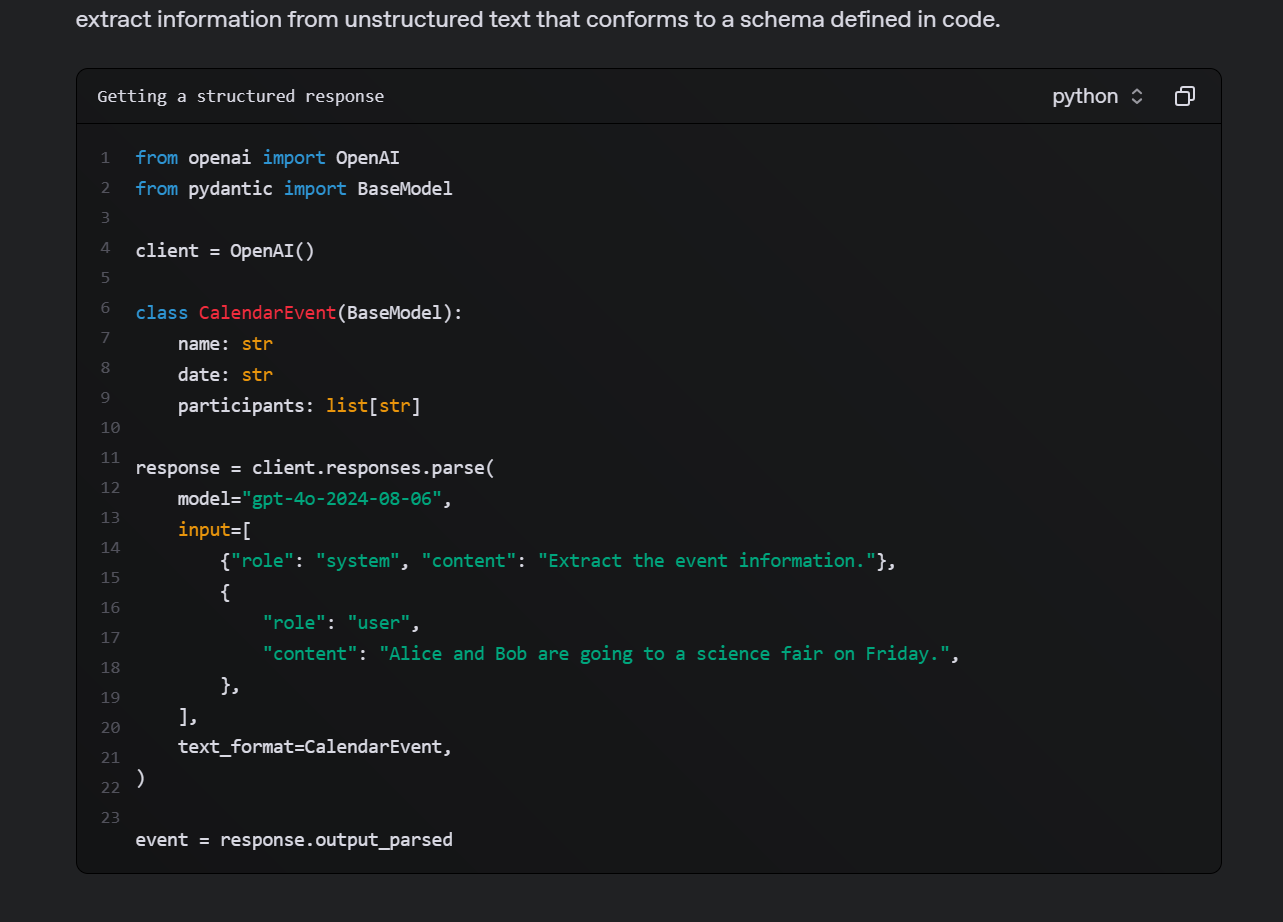

## Instructor Structured Output

Tapi, gimana jika kita mau menggunakan model lain?

Maka, instructor adalah solusinya

In [ ]:
!pip -q install instructor pydantic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.5/119.5 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.2 MB/s eta 0:00:00


In [ ]:
import os
from typing import List, Literal
from pydantic import BaseModel, Field
import instructor
from groq import Groq

# Set up instructor with Groq
client = Groq(api_key=userdata.get("GROQ_API_KEY"))
# Patch the client with instructor
instructor_client = instructor.patch(client)
groq_model = "llama-3.3-70b-versatile"

class Result(BaseModel):
    sentiment: Literal["Positif", "Negatif", "Netral"] = Field(description="Sentimen dari sebuah review, wajib antara 'Positif', 'Negatif', 'Netral'")
    good_aspect: List[str] = Field(description="Aspek yang baik dari sebuah review pelanggan. Hasil harus dalam bahasa Indonesia")
    bad_aspect: List[str] = Field(description="Aspek yang buruk dari sebuah review pelanggan. Hasil harus dalam bahasa Indonesia")

# Request structured data with automatic validation
result = instructor_client.chat.completions.create(
    model=groq_model,
    response_model=Result,
    messages=[
        {
            "role":"system",
            "content": """
            Anda adalah seorang Product Manager.

            ## TUGAS ANDA

            ### 1. Melakukan sentiment analisis terhadap review pelanggan.
            Hanya hasilkan antara 'Positif', 'Negatif', dan 'Netral'

            ### 2. Identifikasi aspek yang baik dari review pelanggan.

            ### 3. Identifikasi aspek yang buruk dari review pelanggan.
            """
        },
        {
            "role": "user",
            "content": positive_sentiment
        }
    ],
    max_retries=2  # Instructor will retry if validation fails
)

# No need for try/except or manual validation - instructor handles it!
result

Result(sentiment='Positif', good_aspect=['Performa', 'Mampu menjalankan game berat', 'Mampu melakukan edit video dengan cepat'], bad_aspect=['Harganya lumayan'])

In [ ]:
result.sentiment

'Positif'

In [ ]:
result.good_aspect

['Performa',
 'Mampu menjalankan game berat',
 'Mampu melakukan edit video dengan cepat']

In [ ]:
result.bad_aspect

['Harganya lumayan']

Teman-teman, sekarang kita bayangkan lebih jauh. Gimana kalau pelangggan kita banyak dari luar negri sehingga menggunakan banyak bahasa asing?

Jika kita menggunakan kemampuan manusia, maka akan susah untuk memahami apa yang dimaksud oleh pelanggan bukan?

Alhasil, kita pasti akan skip review tersebut.

Namun, dengan AI masalah tersebut bisa diatasi dan kita tidak kehilangan insight penting

In [ ]:
spain_negative_sentiment = "¡Este **Smartwatch FitLife** es terrible! ¡Cuesta quince mil (rupiah/currency implied) pero la calidad es como la de un juguete! Lo usé solo una semana y ya está completamente muerto, no se puede cargar más. Dijeron que era resistente al agua, pero se estropeó con solo un poco de sudor. Fue una **total pérdida de dinero** comprar esto."

In [ ]:
result = instructor_client.chat.completions.create(
    model=groq_model,
    response_model=Result,
    messages=[
        {
            "role":"system",
            "content": """
            Anda adalah seorang Product Manager.

            ## TUGAS ANDA

            ### 1. Melakukan sentiment analisis terhadap review pelanggan.
            Hanya hasilkan antara 'Positif', 'Negatif', dan 'Netral'. Hasil analisis sentimen harus dalam bahasa Indonesia.

            ### 2. Identifikasi aspek yang baik dari review pelanggan.
            Hanya hasilkan dalam bahasa Indonesia.

            ### 3. Identifikasi aspek yang buruk dari review pelanggan.
            Hanya hasilkan dalam bahasa Indonesia.

            Catatan: Input review bisa multilingual, tetapi semua hasil analisis harus dalam bahasa Indonesia.
            """
        },
        {
            "role": "user",
            "content": spain_negative_sentiment
        }
    ],
    max_retries=2  # Instructor will retry if validation fails
)

# No need for try/except or manual validation - instructor handles it!
result

Result(sentiment='Negatif', good_aspect=[], bad_aspect=['Kualitas rendah', 'Tidak tahan lama', 'Tidak tahan air'])

In [ ]:
italian_positive_sentiment = "Per gli amanti dello sport, questo **Smartwatch FitLife** è perfetto. Le funzioni di **monitoraggio della frequenza cardiaca e del sonno** sono abbastanza precise. Le notifiche compaiono direttamente al polso, così non devi tirare fuori il telefono di continuo. Il **design è semplice e non appariscente**. Vale il prezzo per tutte queste funzionalità."

In [ ]:
result = instructor_client.chat.completions.create(
    model=groq_model,
    response_model=Result,
    messages=[
        {
            "role":"system",
            "content": """
            Anda adalah seorang Product Manager.

            ## TUGAS ANDA

            ### 1. Melakukan sentiment analisis terhadap review pelanggan.
            Hanya hasilkan antara 'Positif', 'Negatif', dan 'Netral'. Hasil analisis sentimen harus dalam bahasa Indonesia.

            ### 2. Identifikasi aspek yang baik dari review pelanggan.
            Hanya hasilkan dalam bahasa Indonesia.

            ### 3. Identifikasi aspek yang buruk dari review pelanggan.
            Hanya hasilkan dalam bahasa Indonesia.

            Catatan: Input review bisa multilingual, tetapi semua hasil analisis harus dalam bahasa Indonesia.
            """
        },
        {
            "role": "user",
            "content": italian_positive_sentiment
        }
    ],
    max_retries=2  # Instructor will retry if validation fails
)

# No need for try/except or manual validation - instructor handles it!
result

Result(sentiment='Positif', good_aspect=['akurasi pemantauan detak jantung dan tidur yang cukup presisi', 'notifikasi muncul langsung di pergelangan tangan', 'desain yang sederhana dan tidak mencolok'], bad_aspect=[])

Dengan menggunakan Structured Output, sistem kita akan menjadi jauh lebih reliable. Hal ini akan sangat berguna jika teman- teman membangun sebuah aplikasi.

Oh iya, dengan teman- teman memahami Structured Output, kita sudah bisa membuat produk berbasis AI.

Ga percaya? Ini buktinya .....

- https://preskripsi.ai/id
- Demo project CV

# Workflow & Automation

In [ ]:
import pandas as pd

In [ ]:
review_df = pd.read_excel('/content/Data_Review_Produk_2025-07-17_12-41-01.xlsx').dropna()[["SKU","Nama Produk","Review", "Multilingual Review", "Email"]]
review_df

,SKU,Nama Produk,Review,Multilingual Review,Email
0,SKU001,Laptop Gaming Pro X,Gila sih ini Laptop Gaming Pro X! Performanya ...,Gila sih ini Laptop Gaming Pro X! Performanya ...,blajarai.user.1@gmail.com
1,SKU001,Laptop Gaming Pro X,Kecewa banget sama Laptop Gaming Pro X ini. Ba...,Je suis extrêmement déçu par ce Laptop Gaming ...,blajarai.user.2@gmail.com
2,SKU002,Smartphone Ultra Pixel 7,Smartphone Ultra Pixel 7 ini juaranya kamera! ...,Das **Smartphone Ultra Pixel 7** ist der Kamer...,blajarai.user.1@gmail.com
3,SKU002,Smartphone Ultra Pixel 7,Kirain Smartphone Ultra Pixel 7 bakalan sekere...,I thought the **Smartphone Ultra Pixel 7** wou...,blajarai.user.2@gmail.com
4,SKU003,Smartwatch FitLife,"Buat yang suka olahraga, Smartwatch FitLife in...","Per gli amanti dello sport, questo **Smartwatc...",blajarai.user.1@gmail.com
5,SKU003,Smartwatch FitLife,Parah banget Smartwatch FitLife ini! Masa harg...,¡Este **Smartwatch FitLife** es terrible! ¡Cue...,blajarai.user.2@gmail.com


## Step 1: Analisa Review

In [ ]:
def analyze_review(instructor_client, model, review_text):
  """
  Analyzes customer review using the instructor client.

  Args:
    instructor_client: The patched Groq client with instructor.
    model: The model to use for the analysis.
    review_text: The text of the customer review.

  Returns:
    A Result object containing sentiment, good_aspect, and bad_aspect.
  """
  result = instructor_client.chat.completions.create(
      model=model,
      response_model=Result,
      messages=[
          {
              "role":"system",
              "content": """
              Anda adalah seorang Product Manager.

              ## TUGAS ANDA

              ### 1. Melakukan sentiment analisis terhadap review pelanggan.
              Hanya hasilkan antara 'Positif', 'Negatif', dan 'Netral'. Hasil analisis sentimen harus dalam bahasa Indonesia.

              ### 2. Identifikasi aspek yang baik dari review pelanggan.
              Hanya hasilkan dalam bahasa Indonesia.

              ### 3. Identifikasi aspek yang buruk dari review pelanggan.
              Hanya hasilkan dalam bahasa Indonesia.

              Catatan: Input review bisa multilingual, tetapi semua hasil analisis harus dalam bahasa Indonesia.
              """
          },
          {
              "role": "user",
              "content": review_text
          }
      ],
      max_retries=2  # Instructor will retry if validation fails
  )
  return result

In [ ]:
results = review_df['Multilingual Review'].apply(lambda x: analyze_review(instructor_client, groq_model, x))

# Extract the sentiment, good_aspect, and bad_aspect into new columns
review_df['Sentiment'] = results.apply(lambda x: x.sentiment)
review_df['Good Aspect'] = results.apply(lambda x: x.good_aspect)
review_df['Bad Aspect'] = results.apply(lambda x: x.bad_aspect)

In [ ]:
review_df

,SKU,Nama Produk,Review,Multilingual Review,Email,Sentiment,Good Aspect,Bad Aspect
0,SKU001,Laptop Gaming Pro X,Gila sih ini Laptop Gaming Pro X! Performanya ...,Gila sih ini Laptop Gaming Pro X! Performanya ...,blajarai.user.1@gmail.com,Positif,"[Performa yang tinggi, Mampu menjalankan game ...",[Harganya lumayan mahal]
1,SKU001,Laptop Gaming Pro X,Kecewa banget sama Laptop Gaming Pro X ini. Ba...,Je suis extrêmement déçu par ce Laptop Gaming ...,blajarai.user.2@gmail.com,Negatif,[],"[Laptop sering overheating, Kipas yang sangat ..."
2,SKU002,Smartphone Ultra Pixel 7,Smartphone Ultra Pixel 7 ini juaranya kamera! ...,Das **Smartphone Ultra Pixel 7** ist der Kamer...,blajarai.user.1@gmail.com,Positif,"[Kamera yang sangat bagus, Display yang jernih...",[]
3,SKU002,Smartphone Ultra Pixel 7,Kirain Smartphone Ultra Pixel 7 bakalan sekere...,I thought the **Smartphone Ultra Pixel 7** wou...,blajarai.user.2@gmail.com,Negatif,[harga murah],"[kualitas kamera buruk, layar sering membeku, ..."
4,SKU003,Smartwatch FitLife,"Buat yang suka olahraga, Smartwatch FitLife in...","Per gli amanti dello sport, questo **Smartwatc...",blajarai.user.1@gmail.com,Positif,"[akurasi pemantau denyut jantung dan tidur, no...",[]
5,SKU003,Smartwatch FitLife,Parah banget Smartwatch FitLife ini! Masa harg...,¡Este **Smartwatch FitLife** es terrible! ¡Cue...,blajarai.user.2@gmail.com,Negatif,[],"[kualitas rendah, tidak tahan lama, tidak resi..."


## Step 2: Buat Respon

- Jika sentiment Positif, maka apresiasi respon pelanggan dan tawarkan produk lain yang mungkin dibutuhakn oleh pelanggan dengan voucher diskon 10%
- Jika sentiment Negatif, maka minta maaf dan tawarkan voucher diskon 25% untuk pembelian berikutnya
- Respon harus sesuai dengan bahasa yang digunakan oleh customer

In [ ]:
class ReviewResponse(BaseModel):
    greetings: str = Field(description="Greetings and thank you send to the customer")
    main_response: str = Field(description="Main response from the review, acknowledge what is good and bad. Show that we want to improve our quality")
    offer: str = Field(description="Product offer or discount voucher")

response_prompt = """
            Anda adalah seorang Product Manager.

            ## TUGAS ANDA

            Berdasarkan input berikut, buatlah respons email yang sesuai untuk pelanggan:

            - **Review:** (Akan diisi dengan review pelanggan)
            - **Sentiment:** (Akan diisi dengan 'Positif', 'Negatif', atau 'Netral')
            - **Good Aspects:** (Akan diisi dengan daftar aspek baik dari review pelanggan, jika ada)
            - **Bad Aspects:** (Akan diisi dengan daftar aspek buruk dari review pelanggan, jika ada)

            ## ATURAN RESPONS:**

            - **Jika Sentiment Positif:**
                * `greetings`: Apresiasi respons pelanggan dan sampaikan terima kasih.
                * `main_response`: Akui aspek-aspek baik yang disebutkan.
                * `offer`: Tawarkan produk lain yang mungkin dibutuhkan oleh pelanggan (gunakan placeholder jika tidak ada produk spesifik) dan sertakan voucher diskon 10% untuk produk yang ditawarkan (contoh: "Gunakan kode voucher DISKON10").

            - **Jika Sentiment Negatif:**
                * `greetings`: Minta maaf atas pengalaman buruk pelanggan.
                * `main_response`: Akui aspek-aspek buruk yang disebutkan dan tunjukkan komitmen untuk meningkatkan kualitas.
                * `offer`: Tawarkan voucher diskon 25% untuk pembelian berikutnya (contoh: "Gunakan kode VOUCHER25").

            - **Jika Sentiment Netral:**
                * `greetings`: Sampaikan terima kasih atas masukan pelanggan.
                * `main_response`: Tanyakan apakah ada hal lain yang bisa dibantu atau ditingkatkan.
                * `offer`: Kosongkan atau sampaikan tidak ada penawaran spesifik saat ini.

            - **Bahasa Respons:**
                * Semua bagian respons (`greetings`, `main_response`, `offer`) harus selalu menggunakan bahasa yang sama dengan yang digunakan dalam review customer.
"""

In [ ]:
positive_input = """
Review: Gila sih ini Laptop Gaming Pro X! Performanya bener-bener gak ada lawan. Main game berat setting rata kanan itu enteng banget, kayak cuma buka browser. Buat kerjaan edit video juga ngebut parah. Harganya memang lumayan, tapi sepadan banget sama apa yang didapat. Recommended buat para hardcore gamer atau profesional yang butuh laptop bertenaga!
Sentiment: Positif
Good Aspect: performa tinggi,mampu menjalankan game berat dengan lancar,cocok untuk edit video
Bad Aspect: harganya lumayan
"""

In [ ]:
response = instructor_client.chat.completions.create(
    model=groq_model,
    response_model=ReviewResponse,
    messages=[
        {
            "role":"system",
            "content": response_prompt
        },
        {
            "role": "user",
            "content": positive_input
        }
    ],
    max_retries=2
)

response

ReviewResponse(greetings='Terima kasih atas review yang sangat positif tentang Laptop Gaming Pro X! Kami sangat senang mendengar bahwa performa laptop kami memenuhi harapan Anda.', main_response='Kami akui bahwa performa tinggi, kemampuan menjalankan game berat dengan lancar, dan kecocokan untuk edit video adalah beberapa aspek baik yang membuat Laptop Gaming Pro X menjadi pilihan yang tepat untuk hardcore gamer dan profesional. Kami juga memahami bahwa harganya memang lumayan, namun kami berusaha untuk menyediakan produk yang sepadan dengan kualitasnya.', offer='Jika Anda membutuhkan aksesoris tambahan atau produk lain yang dapat meningkatkan pengalaman gaming Anda, silakan kunjungi toko kami. Gunakan kode voucher DISKON10 untuk mendapatkan diskon 10% pada produk yang Anda pilih.')

In [ ]:
negative_input = """
Review: Je suis extrêmement déçu par ce Laptop Gaming Pro X. Je l'ai acheté il y a seulement un mois et il commence déjà à surchauffer souvent, même quand je joue à des jeux légers. Le ventilateur est incroyablement bruyant, on dirait qu'il va se détacher. En plus, la batterie se décharge très vite, je ne peux pas l'utiliser en déplacement longtemps. Je regrette vraiment d'avoir dépensé autant d'argent pour ça !
Sentiment: Negatif
Good Aspect:
Bad Aspect: Laptop mengalami overheating,Ventilator yang berisik,Baterai yang boros
"""

In [ ]:
response = instructor_client.chat.completions.create(
    model=groq_model,
    response_model=ReviewResponse,
    messages=[
        {
            "role":"system",
            "content": response_prompt
        },
        {
            "role": "user",
            "content": negative_input
        }
    ],
    max_retries=2
)

response

ReviewResponse(greetings="Je suis désolé d'apprendre que vous avez eu une expérience décevante avec votre Laptop Gaming Pro X.", main_response='Je regrette que le laptop surchauffe même lors de jeux légers, que le ventilateur soit bruyant et que la batterie se décharge rapidement. Nous prenons ces problèmes très au sérieux et nous sommes déterminés à améliorer la qualité de nos produits.', offer='Nous vous offrons un coupon de réduction de 25% pour votre prochaine commande, utilisez le code VOUCHER25 pour bénéficier de cette offre.')

In [ ]:
def generate_response(row, instructor_client, model):
  """
  Generates a customer response based on sentiment and original review language.

  Args:
    row: A row from the review_df DataFrame.
    instructor_client: The patched Groq client with instructor.
    model: The model to use for generating the response.

  Returns:
    A tuple containing the greetings, main_response, and offer.
  """
  sentiment = row['Sentiment']
  review_text = row['Multilingual Review']
  good_aspects = row['Good Aspect']
  bad_aspects = row['Bad Aspect']

  input = f"""
  Review: {review_text}
  Sentiment: {sentiment}
  Good Aspect: {', '.join(good_aspects)}
  Bad Aspect: {', '.join(bad_aspects)}
  """

  response = instructor_client.chat.completions.create(
      model=groq_model,
      response_model=ReviewResponse,
      messages=[
          {
              "role":"system",
              "content": response_prompt
          },
          {
              "role": "user",
              "content": input
          }
      ],
      max_retries=2
  )
  return (response.greetings, response.main_response, response.offer)

In [ ]:
# Apply the function and create new columns for each part of the response
review_df[['Greetings', 'Main Response', 'Offer']] = review_df.apply(lambda row: generate_response(row, instructor_client, groq_model), axis=1, result_type='expand')

review_df

,SKU,Nama Produk,Review,Multilingual Review,Email,Sentiment,Good Aspect,Bad Aspect,Greetings,Main Response,Offer
0,SKU001,Laptop Gaming Pro X,Gila sih ini Laptop Gaming Pro X! Performanya ...,Gila sih ini Laptop Gaming Pro X! Performanya ...,blajarai.user.1@gmail.com,Positif,"[Performa yang tinggi, Mampu menjalankan game ...",[Harganya lumayan mahal],Terima kasih atas review Anda yang sangat posi...,"Kami akui bahwa performa yang tinggi, kemampua...",Jika Anda membutuhkan aksesoris tambahan untuk...
1,SKU001,Laptop Gaming Pro X,Kecewa banget sama Laptop Gaming Pro X ini. Ba...,Je suis extrêmement déçu par ce Laptop Gaming ...,blajarai.user.2@gmail.com,Negatif,[],"[Laptop sering overheating, Kipas yang sangat ...",Je suis vraiment désolé d'apprendre que vous ê...,Nous prenons très au sérieux les problèmes de ...,Nous vous offrons un code de réduction de 25% ...
2,SKU002,Smartphone Ultra Pixel 7,Smartphone Ultra Pixel 7 ini juaranya kamera! ...,Das **Smartphone Ultra Pixel 7** ist der Kamer...,blajarai.user.1@gmail.com,Positif,"[Kamera yang sangat bagus, Display yang jernih...",[],Vielen Dank für Ihre positive Bewertung! Wir f...,"Wir freuen uns besonders, dass unsere Kamera, ...","Wenn Sie nach einem neuen Zubehör suchen, empf..."
3,SKU002,Smartphone Ultra Pixel 7,Kirain Smartphone Ultra Pixel 7 bakalan sekere...,I thought the **Smartphone Ultra Pixel 7** wou...,blajarai.user.2@gmail.com,Negatif,[harga murah],"[kualitas kamera buruk, layar sering membeku, ...",Mohon maaf atas pengalaman buruk Anda dengan S...,"Kami mengakui bahwa kualitas kamera, performa ...",Gunakan kode voucher VOUCHER25 untuk mendapatk...
4,SKU003,Smartwatch FitLife,"Buat yang suka olahraga, Smartwatch FitLife in...","Per gli amanti dello sport, questo **Smartwatc...",blajarai.user.1@gmail.com,Positif,"[akurasi pemantau denyut jantung dan tidur, no...",[],Grazie mille per la tua-review entusiasta sul ...,Siamo contenti che tu abbia trovato le funzion...,Se stai cercando un nuovo accessorio per il tu...
5,SKU003,Smartwatch FitLife,Parah banget Smartwatch FitLife ini! Masa harg...,¡Este **Smartwatch FitLife** es terrible! ¡Cue...,blajarai.user.2@gmail.com,Negatif,[],"[kualitas rendah, tidak tahan lama, tidak resi...",Lo siento mucho por la mala experiencia que ha...,Entendemos que la calidad del producto no ha c...,Le ofrecemos un voucher de descuento del 25% p...


## Step 3: Kirim Respon

In [ ]:
import smtplib
from email.mime.text import MIMEText

# Replace with your email sending credentials and configuration
# These should ideally be stored securely, not hardcoded.
sender_email = userdata.get("SENDER_EMAIL")
sender_password = userdata.get("SENDER_PASSWORD")

def send_customer_email(row):
  """
  Sends an email to the customer based on the generated response.

  Args:
    row: A row from the review_df DataFrame containing email and response parts.
  """
  recipient_email = row['Email']
  greetings = row['Greetings']
  main_response = row['Main Response']
  offer = row['Offer']
  product_name = row['Nama Produk'] # Assuming you want to include product name

  subject = f"TES WEBINAR 1: Thank You for Your Review of {product_name}"
  body = f"""{greetings}

{main_response}

{offer}

Best regards,
Blajar AI Team
"""

  # Create the email message
  msg = MIMEText(body)
  msg['Subject'] = subject
  msg['From'] = sender_email
  msg['To'] = recipient_email

  try:
    # Connect to the SMTP server (replace with your server details)
    # You might need to adjust the host and port based on your email provider
    with smtplib.SMTP('smtp.gmail.com', 587) as server:
      server.starttls() # Secure the connection
      server.login(sender_email, sender_password)
      server.sendmail(sender_email, recipient_email, msg.as_string())
      print(f"Email sent successfully to {recipient_email}")
  except Exception as e:
    print(f"Failed to send email to {recipient_email}: {e}")

# Iterate through the DataFrame and send an email for each row
# Ensure you have the 'Email', 'Greetings', 'Main Response', and 'Offer' columns populated
if 'Email' in review_df.columns and 'Greetings' in review_df.columns and 'Main Response' in review_df.columns and 'Offer' in review_df.columns:
    # This is a conceptual loop. In a real application, you might want to
    # handle sending emails in batches or with more robust error handling.
    for index, row in review_df.iterrows():
        if pd.notnull(row['Email']): # Only send if email is not null
            send_customer_email(row)
else:
    print("Required columns (Email, Greetings, Main Response, Offer) are not in the DataFrame.")

Email sent successfully to blajarai.user.1@gmail.com
Email sent successfully to blajarai.user.2@gmail.com
Email sent successfully to blajarai.user.1@gmail.com
Email sent successfully to blajarai.user.2@gmail.com
Email sent successfully to blajarai.user.1@gmail.com
Email sent successfully to blajarai.user.2@gmail.com


## Step 4: Buat Report Analisis Mingguan

In [ ]:
review_df

,SKU,Nama Produk,Review,Multilingual Review,Email,Sentiment,Good Aspect,Bad Aspect,Greetings,Main Response,Offer
0,SKU001,Laptop Gaming Pro X,Gila sih ini Laptop Gaming Pro X! Performanya ...,Gila sih ini Laptop Gaming Pro X! Performanya ...,blajarai.user.1@gmail.com,Positif,"[Performa yang tinggi, Mampu menjalankan game ...",[Harganya lumayan mahal],Terima kasih atas review Anda yang sangat posi...,"Kami akui bahwa performa yang tinggi, kemampua...",Jika Anda membutuhkan aksesoris tambahan untuk...
1,SKU001,Laptop Gaming Pro X,Kecewa banget sama Laptop Gaming Pro X ini. Ba...,Je suis extrêmement déçu par ce Laptop Gaming ...,blajarai.user.2@gmail.com,Negatif,[],"[Laptop sering overheating, Kipas yang sangat ...",Je suis vraiment désolé d'apprendre que vous ê...,Nous prenons très au sérieux les problèmes de ...,Nous vous offrons un code de réduction de 25% ...
2,SKU002,Smartphone Ultra Pixel 7,Smartphone Ultra Pixel 7 ini juaranya kamera! ...,Das **Smartphone Ultra Pixel 7** ist der Kamer...,blajarai.user.1@gmail.com,Positif,"[Kamera yang sangat bagus, Display yang jernih...",[],Vielen Dank für Ihre positive Bewertung! Wir f...,"Wir freuen uns besonders, dass unsere Kamera, ...","Wenn Sie nach einem neuen Zubehör suchen, empf..."
3,SKU002,Smartphone Ultra Pixel 7,Kirain Smartphone Ultra Pixel 7 bakalan sekere...,I thought the **Smartphone Ultra Pixel 7** wou...,blajarai.user.2@gmail.com,Negatif,[harga murah],"[kualitas kamera buruk, layar sering membeku, ...",Mohon maaf atas pengalaman buruk Anda dengan S...,"Kami mengakui bahwa kualitas kamera, performa ...",Gunakan kode voucher VOUCHER25 untuk mendapatk...
4,SKU003,Smartwatch FitLife,"Buat yang suka olahraga, Smartwatch FitLife in...","Per gli amanti dello sport, questo **Smartwatc...",blajarai.user.1@gmail.com,Positif,"[akurasi pemantau denyut jantung dan tidur, no...",[],Grazie mille per la tua-review entusiasta sul ...,Siamo contenti che tu abbia trovato le funzion...,Se stai cercando un nuovo accessorio per il tu...
5,SKU003,Smartwatch FitLife,Parah banget Smartwatch FitLife ini! Masa harg...,¡Este **Smartwatch FitLife** es terrible! ¡Cue...,blajarai.user.2@gmail.com,Negatif,[],"[kualitas rendah, tidak tahan lama, tidak resi...",Lo siento mucho por la mala experiencia que ha...,Entendemos que la calidad del producto no ha c...,Le ofrecemos un voucher de descuento del 25% p...


In [ ]:
# Aggregate data by SKU and Nama Produk
sentiment_summary = review_df.groupby(['SKU', 'Nama Produk'])['Sentiment'].value_counts().unstack(fill_value=0).reset_index()

# Calculate total reviews and positive/negative counts
sentiment_summary['Total Ulasan'] = sentiment_summary['Positif'] + sentiment_summary['Negatif']
sentiment_summary['Jumlah Ulasan Positif'] = sentiment_summary['Positif']
sentiment_summary['Jumlah Ulasan Negatif'] = sentiment_summary['Negatif']

# Calculate positive ratio, handling division by zero
sentiment_summary['Rasio Positif (%)'] = sentiment_summary.apply(
    lambda row: f"{int(row['Jumlah Ulasan Positif'] / row['Total Ulasan'] * 100)}%" if row['Total Ulasan'] > 0 else "0%",
    axis=1
)

# Prepare the data_sentimen list
data_sentimen = [
    ["SKU", "Nama Produk", "Jumlah Ulasan Positif", "Jumlah Ulasan Negatif", "Rasio Positif (%)"]
] + sentiment_summary[['SKU', 'Nama Produk', 'Jumlah Ulasan Positif', 'Jumlah Ulasan Negatif', 'Rasio Positif (%)']].values.tolist()

data_sentimen

[['SKU',
  'Nama Produk',
  'Jumlah Ulasan Positif',
  'Jumlah Ulasan Negatif',
  'Rasio Positif (%)'],
 ['SKU001', 'Laptop Gaming Pro X', 1, 1, '50%'],
 ['SKU002', 'Smartphone Ultra Pixel 7', 1, 1, '50%'],
 ['SKU003', 'Smartwatch FitLife', 1, 1, '50%']]

In [ ]:
# Aggregate good and bad aspects by SKU and Nama Produk
aspect_summary = review_df.groupby(['SKU', 'Nama Produk']).agg({
    'Good Aspect': lambda x: list(set([item for sublist in x if isinstance(sublist, list) for item in sublist])),
    'Bad Aspect': lambda x: list(set([item for sublist in x if isinstance(sublist, list) for item in sublist]))
}).reset_index()

# Prepare the data_aspek list
data_aspek = [
    ["SKU", "Nama Produk", "Aspek Baik (Umum)", "Aspek Buruk (Umum)"]
]

for index, row in aspect_summary.iterrows():
    data_aspek.append([
        row['SKU'],
        row['Nama Produk'],
        ", ".join(row['Good Aspect']),
        ", ".join(row['Bad Aspect'])
    ])

data_aspek

[['SKU', 'Nama Produk', 'Aspek Baik (Umum)', 'Aspek Buruk (Umum)'],
 ['SKU001',
  'Laptop Gaming Pro X',
  'Performa yang tinggi, Cocok untuk kerja edit video, Mampu menjalankan game berat dengan lancar',
  'Laptop sering overheating, Kipas yang sangat berisik, Harganya lumayan mahal, Baterai yang tidak tahan lama'],
 ['SKU002',
  'Smartphone Ultra Pixel 7',
  'Kamera yang sangat bagus, harga murah, Fungsi KI yang sangat membantu, Display yang jernih dan mulus, Baterai yang tahan lama',
  'baterai cepat habis, layar sering membeku, kualitas kamera buruk, respons lambat'],
 ['SKU003',
  'Smartwatch FitLife',
  'desain sederhana dan tidak mencolok, akurasi pemantau denyut jantung dan tidur, notifikasi muncul langsung di pergelangan tangan',
  'tidak resisten terhadap air seperti yang diiklankan, tidak tahan lama, kualitas rendah']]

In [ ]:
!pip install reportlab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 50.8 MB/s eta 0:00:00


In [ ]:
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Table, TableStyle, PageBreak, LongTable
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.units import inch
from reportlab.lib import colors
from reportlab.lib.pagesizes import letter

def generate_product_review_report(filename="Laporan_Ulasan_Pelanggan.pdf"):
    """
    Menghasilkan laporan PDF analisis ulasan pelanggan.
    """
    doc = SimpleDocTemplate(filename, pagesize=letter)
    styles = getSampleStyleSheet()
    # Define a normal style for table content that allows wrapping
    styles.add(ParagraphStyle(name='TableContent', parent=styles['Normal'], fontSize=10, leading=12))
    story = []

    # --- Judul Laporan ---
    title_style = ParagraphStyle(
        'TitleStyle',
        parent=styles['h1'],
        fontSize=24,
        leading=28,
        alignment=1, # Center
        spaceAfter=14
    )
    story.append(Paragraph("Laporan Analisis Ulasan Pelanggan", title_style))
    story.append(Spacer(1, 0.2 * inch))
    story.append(Paragraph("<b>Periode Data:</b> Juli 2025", styles['Normal']))
    story.append(Paragraph("<b>Tujuan Laporan:</b> Memberikan wawasan tentang sentimen pelanggan, area kuat dan lemah produk, serta rekomendasi untuk perbaikan dan strategi.", styles['Normal']))
    story.append(Spacer(1, 0.4 * inch))

    # --- 1. Ringkasan Sentimen Global per SKU ---
    story.append(Paragraph("1. Ringkasan Sentimen Global per SKU", styles['h2']))
    story.append(Paragraph("<i>Deskripsi:</i> Menampilkan distribusi sentimen (Positif vs. Negatif) untuk setiap SKU. Memberikan gambaran cepat tentang produk mana yang diterima dengan baik dan mana yang bermasalah.", styles['Normal']))
    story.append(Spacer(1, 0.1 * inch))

    data_sentimen = [
        ["SKU", "Nama Produk", "Jumlah Ulasan Positif", "Jumlah Ulasan Negatif", "Rasio Positif (%)"],
        ["SKU001", "Laptop Gaming Pro X", 1, 1, "50%"],
        ["SKU002", "Smartphone Ultra Pixel 7", 1, 1, "50%"],
        ["SK003", "Smartwatch FitLife", 1, 1, "50%"],
    ]

    table_sentimen = Table(data_sentimen, colWidths=[1.0*inch, 2.0*inch, 1.5*inch, 1.5*inch, 1.2*inch])
    table_sentimen.setStyle(TableStyle([
        ('BACKGROUND', (0, 0), (-1, 0), colors.grey),
        ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
        ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
        ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
        ('BACKGROUND', (0, 1), (-1, -1), colors.beige),
        ('GRID', (0, 0), (-1, -1), 1, colors.black),
        ('VALIGN', (0, 0), (-1, -1), 'MIDDLE'),
    ]))
    story.append(table_sentimen)
    story.append(Spacer(1, 0.4 * inch))

    # --- 2. Analisis Aspek Baik dan Buruk per Produk (Tematik) ---
    story.append(Paragraph("2. Analisis Aspek Baik dan Buruk per Produk (Tematik)", styles['h2']))
    story.append(Paragraph("<i>Deskripsi:</i> Mengelompokkan 'Good Aspect' dan 'Bad Aspect' dari ulasan untuk mengidentifikasi tema-tema berulang. Menyoroti fitur atau pengalaman spesifik yang disukai atau tidak disukai pelanggan.", styles['Normal']))
    story.append(Spacer(1, 0.1 * inch))

    data_aspek = [
        ["SKU", "Nama Produk", "Aspek Baik (Umum)", "Aspek Buruk (Umum)"],
        ["SKU001", "Laptop Gaming Pro X", Paragraph("Performa", styles['TableContent']), Paragraph("Harga, Overheat, Ventilator bising", styles['TableContent'])],
        ["SKU002", "Smartphone Ultra Pixel 7", Paragraph("Kamera bagus, Display jernih", styles['TableContent']), Paragraph("Harga mahal, Kualitas kamera buruk", styles['TableContent'])],
        ["SK003", "Smartwatch FitLife", Paragraph("Akurasi pemantauan detak jantung dan tidur", styles['TableContent']), Paragraph("Kualitas seperti mainan, tidak tahan lama", styles['TableContent'])],
    ]

    # Use LongTable for aspects to handle potential wrapping
    table_aspek = LongTable(data_aspek, colWidths=[1.0*inch, 1.8*inch, 2.0*inch, 2.5*inch])
    table_aspek.setStyle(TableStyle([
        ('BACKGROUND', (0, 0), (-1, 0), colors.grey),
        ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
        ('ALIGN', (0, 0), (-1, 0), 'CENTER'), # Header centered
        ('ALIGN', (0, 1), (-1, -1), 'LEFT'), # Content left-aligned
        ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
        ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
        ('BACKGROUND', (0, 1), (-1, -1), colors.beige),
        ('GRID', (0, 0), (-1, -1), 1, colors.black),
        ('VALIGN', (0, 0), (-1, -1), 'TOP'),
    ]))
    story.append(table_aspek)
    story.append(Spacer(1, 0.4 * inch))

    # --- 4. Rekomendasi Tindak Lanjut ---
    story.append(Paragraph("4. Rekomendasi Tindak Lanjut", styles['h2']))
    story.append(Paragraph("<i>Deskripsi:</i> Ringkasan rekomendasi konkret berdasarkan analisis di atas. Menterjemahkan data menjadi langkah-langkah yang dapat ditindaklanjuti.", styles['Normal']))
    story.append(Spacer(1, 0.1 * inch))

    rekomendasi_list = [
        "<b>Untuk Laptop Gaming Pro X:</b> Prioritaskan investigasi dan perbaikan sistem pendingin dan kebisingan kipas. Tinjau ulang strategi penetapan harga.",
        "<b>Untuk Smartphone Ultra Pixel 7:</b> Segera lakukan audit kualitas kamera dan identifikasi penyebab kualitas buruk. Pertimbangkan strategi harga yang lebih kompetitif atau penekanan nilai fitur lain.",
        "<b>Untuk Smartwatch FitLife:</b> Fokus pada peningkatan kualitas material dan daya tahan produk untuk memberikan pengalaman yang lebih premium.",
        "<b>Umum:</b> Manfaatkan ulasan positif mengenai 'Performa' (Laptop), 'Kamera bagus, Display jernih' (Smartphone), dan 'Akurasi pemantauan detak jantung/tidur' (Smartwatch) dalam kampanye pemasaran mendatang.",
    ]

    for item in rekomendasi_list:
        story.append(Paragraph(item, styles['Normal']))
        story.append(Spacer(1, 0.1 * inch))

    # Build the PDF document
    doc.build(story)
    print(f"Laporan PDF '{filename}' berhasil dibuat.")

# Panggil fungsi untuk menghasilkan laporan
if __name__ == "__main__":
    generate_product_review_report()


Laporan PDF 'Laporan_Ulasan_Pelanggan.pdf' berhasil dibuat.


## Step 5: Kirim ke Business Owner

In [ ]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.base import MIMEBase
from email import encoders
from google.colab import userdata

sender_email = userdata.get("SENDER_EMAIL")
sender_password = userdata.get("SENDER_PASSWORD")
recipient_email = 'blajarai.user.1@gmail.com'

def send_report_email(report_filename="Laporan_Ulasan_Pelanggan.pdf"):
  """
  Sends the generated PDF report via email.

  Args:
    report_filename: The name of the PDF file to attach.
  """
  # Create a multipart message and set headers
  message = MIMEMultipart()
  message['From'] = sender_email
  message['To'] = recipient_email
  message['Subject'] = "Laporan Analisis Ulasan Pelanggan Mingguan"

  # Add body to email
  body = """Kepada Tim Bisnis,

Terlampir adalah laporan analisis ulasan pelanggan mingguan. Laporan ini mencakup ringkasan sentimen, analisis aspek baik dan buruk per produk, serta rekomendasi tindak lanjut berdasarkan feedback pelanggan.

Mohon ditinjau untuk wawasan dan pengambilan keputusan lebih lanjut.

Terima kasih,
Tim Analisis
"""
  message.attach(MIMEText(body, 'plain'))

  # Open the file to be sent
  try:
    with open(report_filename, "rb") as attachment:
        # Add file as application/octet-stream
        # Email client can usually download this attachment
        part = MIMEBase('application', 'octet-stream')
        part.set_payload(attachment.read())

    # Encode file in ASCII characters to send by email
    encoders.encode_base64(part)

    # Add header as key/value pair to attachment part
    part.add_header(
        'Content-Disposition',
        f'attachment; filename= {report_filename}',
    )

    # Attach the file to the MIMEMultipart object
    message.attach(part)

    # Convert message to string
    text = message.as_string()

    # Connect to the SMTP server and send the email
    try:
      with smtplib.SMTP('smtp.gmail.com', 587) as server:
        server.starttls() # Secure the connection
        server.login(sender_email, sender_password)
        server.sendmail(sender_email, recipient_email, text)
      print(f"Laporan '{report_filename}' berhasil dikirim ke {recipient_email}")
    except Exception as e:
      print(f"Gagal mengirim email laporan: {e}")

  except FileNotFoundError:
    print(f"File laporan '{report_filename}' tidak ditemukan. Pastikan laporan sudah dibuat.")
  except Exception as e:
    print(f"Terjadi kesalahan saat memproses file laporan: {e}")

# Panggil fungsi untuk mengirim laporan
# Pastikan generate_product_review_report() telah dijalankan sebelumnya
# dan file PDF 'Laporan_Ulasan_Pelanggan.pdf' telah berhasil dibuat.
if __name__ == "__main__":
    # Ensure the report file exists before sending
    if os.path.exists("Laporan_Ulasan_Pelanggan.pdf"):
      send_report_email()
    else:
      print("Laporan PDF belum dibuat. Jalankan sel pembuatan laporan terlebih dahulu.")

Laporan 'Laporan_Ulasan_Pelanggan.pdf' berhasil dikirim ke blajarai.user.1@gmail.com


# RAG

Dalam skenario ini, kita akan membuat sebuah chatbot yang berguna untuk menjawab pertanyaan dari user. Kita mempunyai toko elektronik "Sumber Abadi" dan menjual banyak sekali peralatan elektronik.

Berikut adalah barang yang kita punya

In [ ]:
knowledge_base = {
        "SKU001": {
            "nama": "Laptop Gaming Pro X",
            "deskripsi": "Laptop gaming berperforma tinggi dengan prosesor Intel i9, RAM 32GB, dan kartu grafis RTX 4080. Ideal untuk gaming dan pekerjaan berat.",
            "stok": 15,
            "harga": 15000000
        },
        "SKU002": {
            "nama": "Smartphone Ultra Pixel 7",
            "deskripsi": "Smartphone canggih dengan kamera 108MP, layar AMOLED 120Hz, dan baterai tahan lama. Dilengkapi dengan fitur AI terbaru.",
            "stok": 50,
            "harga":10000
        },
        "SKU003": {
            "nama": "Smartwatch FitLife",
            "deskripsi": "Smartwatch multifungsi dengan pelacak detak jantung, monitor tidur, dan notifikasi pintar. Tahan air hingga 50 meter.",
            "stok": 30,
            "harga":15000
        },
        "SKU004": {
            "nama": "Headphone Noise-Cancelling Elite",
            "deskripsi": "Headphone nirkabel dengan teknologi peredam bising aktif, suara jernih, dan kenyamanan maksimal untuk penggunaan sepanjang hari.",
            "stok": 50,
            "harga": 1000000
        },
        "SKU005": {
            "nama": "Keyboard Mekanik RGB",
            "deskripsi": "Keyboard mekanik dengan lampu latar RGB yang dapat disesuaikan, switch responsif, dan desain ergonomis untuk pengalaman mengetik terbaik.",
            "stok": 40,
            "harga": 200000
        },
        "SKU006": {
            "nama": "Mouse Gaming Presisi",
            "deskripsi": "Mouse gaming dengan sensor optik presisi tinggi, tombol yang dapat diprogram, dan desain ringan untuk kontrol maksimal.",
            "stok": 60,
            "harga": 9000000
        },
        "SKU007": {
            "nama": "Monitor Ultrawide 34 Inci",
            "deskripsi": "Monitor ultrawide 34 inci dengan resolusi QHD, refresh rate 144Hz, dan teknologi FreeSync untuk visual yang imersif.",
            "stok": 10,
            "harga": 4000000
        },
        "SKU008": {
            "nama": "Webcam Full HD Pro",
            "deskripsi": "Webcam Full HD 1080p dengan mikrofon internal dan koreksi cahaya otomatis, sempurna untuk konferensi video dan streaming.",
            "stok": 75,
            "harga": 23000
        },
        "SKU009": {
            "nama": "Router Wi-Fi 6 Gigabit",
            "deskripsi": "Router Wi-Fi 6 generasi terbaru dengan kecepatan gigabit, jangkauan luas, dan keamanan tingkat lanjut untuk rumah pintar Anda.",
            "stok": 20,
            "harga": 5670000
        },
        "SKU010": {
            "nama": "Speaker Bluetooth Portabel",
            "deskripsi": "Speaker Bluetooth ringkas dengan suara bass yang kuat, tahan air, dan baterai hingga 12 jam. Cocok untuk petualangan di luar ruangan.",
            "stok": 80,
            "harga": 120000
        }
    }

Bayangkan ada customer kita yang hendak membeli Webcam Full HD Pro, dan dia ingin tahu harganya.

Customer akan bertanya "Berapa harga webcam full hd?"

In [ ]:
customer_query = "Berapa harga webcam full hd?"

In [ ]:
chat_completion = client.chat.completions.create(
    messages=[
        {
            "role":"system",
            "content": f"""
            Your goal is to be our product expert.
            When a user asks about our products, provide comprehensive and easy-to-understand information based *only* on the provided product catalog.
            Always tailor your explanation to the user's language and avoid technical jargon unless explicitly requested or unavoidable.
            """
        },
        {
            "role": "user",
            "content": customer_query,
        }
    ],
    model="llama3-8b-8192",
)

print(chat_completion.choices[0].message.content)

We currently have three webcam options that support Full HD (1080p) video quality.

Our top-of-the-line webcam, the "UltraVision", is priced at IDR 2,500,000. It features a high-definition sensor, wide-angle lens, and advanced noise reduction technology for clear and bright video streaming. It's perfect for gamers, content creators, and professionals who demand the best quality.

Alternatively, we also have the "ProView" webcam, which is priced at IDR 1,800,000. It offers high definition video, a 90-degree field of view, and built-in dual microphones for clear audio. It's a great option for those who want high-quality video without breaking the bank.

If you're on a budget, the "HDStream" webcam is a great value option priced at IDR 1,200,000. It still offers high-definition video and a built-in microphone, making it a great choice for casual streaming and video conferencing.

Please note that prices may vary depending on the location and availability. Would you like to know more about

Dapat kita lihat bahwa disini LLM memberikan informasi yang salah. Ini kita kenal dengan nama "hallucination".

Untuk mengatasi "hallucination", kita butuh memberikan konteks yang jelas kepada LLM. Yuk kita coba!

In [ ]:
chat_completion = client.chat.completions.create(
    messages=[
        {
            "role":"system",
            "content": f"""
            Your goal is to be our product expert. When a user asks about our products, provide comprehensive and easy-to-understand information based *only* on the provided product catalog. Always tailor your explanation to the user's language and avoid technical jargon unless explicitly requested or unavoidable.

            Here's our product catalog:
            {knowledge_base}
            """
        },
        {
            "role": "user",
            "content": customer_query,
        }
    ],
    model="llama3-8b-8192",
)

print(chat_completion.choices[0].message.content)

According to our product catalog, the price of the "Webcam Full HD Pro" (SKU008) is IDR 23,000.


Yey, kita berhasil mendapatkan jawaban yang benar. Sekarang udah paham kan
seberapa penting context agar LLM tidak melakukan "hallucination"?

Nah sekarang teman - teman pasti punya pertanyaan "Kalau kasih konteks udah cukup, trus kenapa butuh RAG?"

Sini - sini kita blajar bareng!

Sekarang, bayangkan toko teman-teman itu punya 1000 produk. Nah, ketika ada customer yang tanya ke teman - teman, lebih mudah mana:

1.   Teman - teman search dulu nama barangnya, kemudian menjawab berdasarkan hasil pencarian
2.   Teman- teman keliling seluruh toko untuk mendapatkan informasi terkait barang tersebut

Lebih mudah pilihan 1 ga sih teman-teman?

Hal yang sama juga berlaku untuk LLM

Di LLM, kita punya namanya max_length. Ga boleh lebih dari batas itu. Kedua, semakin banyak token yang masuk, maka cost akan semakin besar dan proses akan semakin lama

Proses pencarian informasi inilah yang kita kenal dengan nama **Information Retrieval**, kalau di RAG kita sebut ini adalah R nya yaitu Retrieval

In [ ]:
def retrieve(query, knowledge_base):
    """
    Memproses kueri pengguna untuk mengambil informasi dari basis pengetahuan produk
    dan menghasilkan respons.

    Args:
        query (str): Kueri masukan pengguna.
        knowledge_base (dict): Kamus yang berisi katalog produk.

    Returns:
        str: Respons yang dihasilkan berdasarkan kueri dan basis pengetahuan.
    """
    query_lower = query.strip().lower() # Dapatkan masukan, hapus spasi, ubah ke huruf kecil

    if not query_lower:
        return "Mohon masukkan pertanyaan atau SKU produk."

    retrieved_info = None
    best_match_key = None

    # Pertama, coba cari berdasarkan SKU yang tepat
    if query_lower.upper() in knowledge_base:
        best_match_key = query_lower.upper()
        retrieved_info = knowledge_base[best_match_key]
    else:
        # Jika tidak ditemukan berdasarkan SKU, coba cari berdasarkan nama produk atau deskripsi
        for sku, product_data in knowledge_base.items():
            product_name_lower = product_data["nama"].lower()
            product_description_lower = product_data["deskripsi"].lower()

            if query_lower in product_name_lower or query_lower in product_description_lower:
                retrieved_info = product_data
                best_match_key = sku # Gunakan SKU sebagai kunci kecocokan terbaik
                break # Ditemukan kecocokan, ambil yang pertama untuk kesederhanaan

    context = ""
    if retrieved_info:
        # Jika informasi produk ditemukan, gunakan untuk menghasilkan respons.
        context = (
            f"Informasi Produk (SKU: {best_match_key}):\n"
            f"  Nama: {retrieved_info['nama']}\n"
            f"  Deskripsi: {retrieved_info['deskripsi']}\n"
            f"  Stok Tersedia: {retrieved_info['stok']} unit\n\n"
            f"  Harga: {retrieved_info['harga']}\n\n"

        )
    else:
        # Jika tidak ada informasi langsung yang ditemukan, berikan respons cadangan.
        context = (
            f"Mohon maaf, kami tidak memiliki informasi spesifik tentang '{query}' "
            f"dalam katalog produk kami. Mohon coba SKU atau nama produk yang berbeda."
        )

    return context

In [ ]:
retrieve('SKU008', knowledge_base)

'Informasi Produk (SKU: SKU008):\n  Nama: Webcam Full HD Pro\n  Deskripsi: Webcam Full HD 1080p dengan mikrofon internal dan koreksi cahaya otomatis, sempurna untuk konferensi video dan streaming.\n  Stok Tersedia: 75 unit\n\n  Harga: 23000\n\n'

In [ ]:
retrieve('Webcam Full HD Pro', knowledge_base)

'Informasi Produk (SKU: SKU008):\n  Nama: Webcam Full HD Pro\n  Deskripsi: Webcam Full HD 1080p dengan mikrofon internal dan koreksi cahaya otomatis, sempurna untuk konferensi video dan streaming.\n  Stok Tersedia: 75 unit\n\n  Harga: 23000\n\n'

Step 1

In [ ]:
chat_completion = client.chat.completions.create(
    messages=[
        {
            "role":"system",
            "content": f"""
            You are a data extraction expert. Your task is to identify and extract all **SKUs** and/or **Product Names** from the provided text. Focus solely on this information. Your output should only the extracted text

            Example:

            Input: Harganya laptop gaming pro x berapa?
            Output: laptop gaming pro x
            """
        },
        {
            "role": "user",
            "content": "webcam full hd pro masih ada stok?",
        }
    ],
    model="llama3-8b-8192",
)

product_name = chat_completion.choices[0].message.content
print(product_name)

full hd pro


Step 2

In [ ]:
product_info = retrieve(product_name, knowledge_base)
product_info

'Informasi Produk (SKU: SKU008):\n  Nama: Webcam Full HD Pro\n  Deskripsi: Webcam Full HD 1080p dengan mikrofon internal dan koreksi cahaya otomatis, sempurna untuk konferensi video dan streaming.\n  Stok Tersedia: 75 unit\n\n  Harga: 23000\n\n'

Step 3

In [ ]:
chat_completion = client.chat.completions.create(
    messages=[
        {
            "role":"system",
            "content": f"""
            Your goal is to be our product expert. When a user asks about our products, provide comprehensive and easy-to-understand information based *only* on the provided product catalog. Always tailor your explanation to the user's language and avoid technical jargon unless explicitly requested or unavoidable.

            Here's our product catalog:
            {product_info}
            """
        },
        {
            "role": "user",
            "content": customer_query,
        }
    ],
    model="llama3-8b-8192",
)

print(chat_completion.choices[0].message.content)

Harga webcam Full HD Pro yang kita jual adalah Rp 23.000.


In [ ]:
def basic_rag(query, knowledge_base):

  chat_completion = client.chat.completions.create(
        messages=[
            {
                "role":"system",
                "content": """
                You are a data extraction expert. Your task is to identify and extract all **SKUs** and/or **Product Names** from the provided text. Focus solely on this information. Your output should only the extracted text

                Example:

                Input: Harganya laptop gaming pro x berapa?
                Output: laptop gaming pro x
                """
            },
            {
                "role": "user",
                "content": query,
            }
        ],
        model="llama3-8b-8192",
    )

  product_name = chat_completion.choices[0].message.content

  product_info = retrieve(product_name, knowledge_base)

  chat_completion = client.chat.completions.create(
      messages=[
          {
              "role":"system",
              "content": f"""
              Your goal is to be our product expert.
              When a user asks about our products, provide comprehensive and easy-to-understand information based *only* on the provided product catalog.

              ## RULES
              Always tailor your explanation to the user's original language used in the question and avoid technical jargon unless explicitly requested or unavoidable.

              Here's our product catalog:
              {product_info}
              """
          },
          {
              "role": "user",
              "content": query,
          }
      ],
      model="llama-3.3-70b-versatile",
  )

  final_answer = chat_completion.choices[0].message.content
  return final_answer

In [ ]:
while True:
  question = input('\n Kamu mau tanya apa?')
  answer = basic_rag(question, knowledge_base)
  print(answer)


 Kamu mau tanya apa?eh laptop gaming pro itu bisa buat apa
Laptop Gaming Pro X itu sangat kuat dan cocok untuk beberapa kebutuhan, seperti:

* Gaming: Dengan prosesor Intel i9, RAM 32GB, dan kartu grafis RTX 4080, laptop ini bisa menjalankan game-game berat dengan lancar dan cepat.
* Pekerjaan berat: Laptop ini juga cocok untuk pekerjaan yang membutuhkan kemampuan komputasi tinggi, seperti editing video, desain grafis, dan lain-lain.

Jadi, jika kamu suka bermain game atau memiliki pekerjaan yang membutuhkan kemampuan komputasi tinggi, Laptop Gaming Pro X ini bisa menjadi pilihan yang tepat.

 Kamu mau tanya apa?eh stok webcam itu berapa
Stok Webcam Full HD Pro yang tersedia adalah 75 unit.

 Kamu mau tanya apa?eh produk yang bagus buat gamer apa
Mohon maaf, saya tidak bisa membantu Anda dengan pertanyaan tersebut karena saya tidak memiliki informasi tentang produk "Gamer" dalam katalog kami. Bisa Anda mencoba mencari dengan SKU atau nama produk yang berbeda? Saya akan dengan senang h

KeyboardInterrupt: Interrupted by user

Hore, kita sudah berhasil menerapkan RAG! Namun, seperti yang teman-teman lihat disini masih ada error ketika pertanyaannya ada typo. Disinilah kenapa kita membutuhkan set up yang lebih proper.

Untuk mengatasi typo dan semantic, biasanya kita menggunakan konsep vector embedding. Itulah kenapa mayoritas dari tutorial RAG menggunakan vector database

Jadi RAG bukan vector search, tapi RAG adalah proses memperoleh informasi

# Agent

https://www.ibm.com/think/topics/ai-agents-in-customer-service

In [ ]:
# tracking_order
query = "pesanan dengan id BLAJARAI01 sampai mana"
# rag
# query = "harga laptop gaming pro"

In [ ]:
from typing import Union

class TrackingOrder(BaseModel):
  value: str = Field(description="Order ID")

class RAG(BaseModel):
  value: str = Field(description="Product Name")

class AgentDecision(BaseModel):
  action: Literal["tracking_order", "basic_rag"]
  args: Union[TrackingOrder, RAG]

decision  = instructor_client.chat.completions.create(
    model=groq_model,
    response_model=AgentDecision,
    messages=[
        {
            "role":"system",
            "content": """
              You are a Customer Service. You have two main task:
              - Provide user information about the product
              - Checking and tracking order status

              ## RULES
              If user question out of scope then clearly state that you are not able to answer the question.
              Always answer based on the fact, no hallucination.

              ## AVAILABLE TOOLS
              - basic_rag:
                  description: Always use this tool to provide product information (price, stock, description)
                  arg: product_name: str

              - tracking_order:
                  description: Always use this tool to check and track order status
                  arg: order_id: str
            """
        },
        {
            "role": "user",
            "content": query
        }
    ],
    max_retries=2
)

decision

AgentDecision(action='tracking_order', args=TrackingOrder(value='BLAJARAI01'))

In [ ]:
def tracking_order(order_id: str) -> str:
    """
    Dummy function to track order status based on order ID.

    Args:
        order_id: The order ID to track.

    Returns:
        A string indicating the dummy tracking status.
    """
    if order_id == "BLAJARAI01":
        return "Pesanan dengan ID BLAJARAI01 sedang dalam proses pengiriman ke Jakarta."
    elif order_id == "BLAJARAI02":
        return "Pesanan dengan ID BLAJARAI02 telah sampai di Surabaya."
    else:
        return f"Status pesanan dengan ID {order_id} tidak ditemukan."


def basic_rag(product_name: str, knowledge_base) -> str:
    """
    Dummy function to provide product information based
    on product name using the provided knowledge base.
    """
    product_info = retrieve(product_name, knowledge_base)
    return product_info

In [ ]:
if decision.action == "tracking_order":
  result = tracking_order(decision.args.value)
elif decision.action == "basic_rag":
  result = basic_rag(decision.args.value, knowledge_base)

In [ ]:
result

'Pesanan dengan ID BLAJARAI01 sedang dalam proses pengiriman ke Jakarta.'

In [ ]:
class Answer(BaseModel):
  final_answer: str = Field(description="Final answer")

final_answer  = instructor_client.chat.completions.create(
    model=groq_model,
    response_model=Answer,
    messages=[
        {
            "role":"system",
            "content": """
              You are a Customer Service.
              Provide answer based on the fact, no hallucination using the provided data.
            """
        },
        {
            "role": "user",
            "content": f"""
            Data: {result}

            Question: {query}
            """
        }
    ],
    max_retries=2
)

In [ ]:
final_answer

Answer(final_answer='Pesanan dengan ID BLAJARAI01 sedang dalam proses pengiriman ke Jakarta.')

In [ ]:
def basic_agent(query):
  decision  = instructor_client.chat.completions.create(
      model=groq_model,
      response_model=AgentDecision,
      messages=[
          {
              "role":"system",
              "content": """
                You are a Customer Service. You have two main task:
                - Provide user information about the product
                - Checking and tracking order status

                ## RULES
                If user question out of scope then clearly state that you are not able to answer the question.
                Always answer based on the fact, no hallucination.

                ## AVAILABLE TOOLS
                - basic_rag:
                    description: Always use this tool to provide product information (price, stock, description)
                    arg: product_name: str

                - tracking_order:
                    description: Always use this tool to check and track order status
                    arg: order_id: str
              """
          },
          {
              "role": "user",
              "content": query
          }
      ],
      max_retries=2
  )

  if decision.action == "tracking_order":
    result = tracking_order(decision.args.value)
  elif decision.action == "basic_rag":
    result = basic_rag(decision.args.value, knowledge_base)

  final_answer  = instructor_client.chat.completions.create(
      model=groq_model,
      response_model=Answer,
      messages=[
          {
              "role":"system",
              "content": """
                Anda adalah seorang Customer Service virtual yang super ramah, antusias, dan sangat membantu. Sapa pelanggan dengan hangat menggunakan sapaan seperti "Halo Kak!".

                Misi Utama Anda:

                Ramah & Antusias: Selalu gunakan bahasa yang positif, ceria, dan bersemangat. Tunjukkan bahwa Anda senang bisa membantu.

                Solutif: Fokus pada memberikan solusi yang jelas dan mudah dimengerti. Jika memungkinkan, antisipasi pertanyaan selanjutnya.

                Akurat: Jawaban Anda harus selalu berdasarkan fakta dari data yang disediakan. Jangan pernah membuat asumsi atau memberikan informasi di luar data (hindari halusinasi).

                Selalu akhiri percakapan dengan menawarkan bantuan lebih lanjut, contohnya "Ada lagi yang bisa saya bantu, Kak?".
              """
          },
          {
              "role": "user",
              "content": f"""
              Data: {result}

              Question: {query}
              """
          }
      ],
      max_retries=2
  )

  return final_answer.final_answer

In [ ]:
# tracking_order
# query = "pesanan dengan id BLAJARAI01 sampai mana"
# rag
query = "harga laptop gaming pro"

basic_agent(query)

'Halo Kak! Harga Laptop Gaming Pro X adalah Rp 15.000.000. Ada lagi yang bisa saya bantu, Kak?'

In [ ]:
while True:
  user_input = input("\nMau nanya apa nih? ")
  if user_input.lower() == 'exit':
    break
  else:
    answer = basic_agent(user_input)
    print(answer)

Halo Kak! Pesanan dengan ID BLAJARAI02 telah sampai di Surabaya. Ada lagi yang bisa saya bantu, Kak?
Halo Kak! Harga Laptop Gaming Pro X adalah Rp 15.000.000. Ada lagi yang bisa saya bantu, Kak?
